In [1]:
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os,sys
from tqdm import tqdm
import proplot as plot
import json,pickle
import dask.array as da
import gc
from sklearn.decomposition import PCA
sys.path.insert(1, '/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/')
from tools import derive_var,read_and_proc,preproc_noensemble
from tools.mlr import mlr
from tools.preprocess import do_eof,preproc_maria
%matplotlib inline
plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
                'tick.labelweight':'ultralight','gridminor.linestyle':'--','title.weight':'normal','linewidth':0.5})

import time
import numpy as np
from dask import delayed
from dask.distributed import Client
client = Client(processes=True, threads_per_worker=1,n_workers=2)

/tmp/ipykernel_2923264/1245973198.py:20: ProplotWarning: rc setting 'linewidth' was renamed to 'meta.width' in version 0.8.
  plot.rc.update({'figure.facecolor':'w','axes.labelweight':'ultralight',
/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/miniconda3/envs/fred_workenv/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45635 instead
  warnings.warn(


In [3]:
############################################################################################################################################################
# uvw-heatsum
############################################################################################################################################################
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc/24h_smoo/'
ctlPCA = do_eof.do_PCA(expname=['ctl'],varname=['u','v','w','qv','theta','heatsum']).do_ctl_PCA(folderpath=folderpath)
############################################################################################################################################################
#folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/flatvar/'
#ctlvar = read_and_proc.depickle(folderpath+'theta_preproc_dict1')['ctlTHETA']
#folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/'
#ctlPCA = do_PCA(expname=['ctl'],varname=['theta']).do_PCA_onevar(ctlvar=ctlvar,folderpath=folderpath)

/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/miniconda3/envs/fred_workenv/lib/python3.9/site-packages/distributed/worker.py:4149: UserWarning: Large object of size 1.68 GiB detected in task graph: 
  (array([[  0.87265646,   1.00778617,   0.99060819, ... 4.00905764]]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


In [4]:
ctlvar.shape

(145, 2344680)

#### Testing

In [3]:
folderpath='/work/FAC/FGSE/IDYST/tbeucler/default/freddy0218/TCGphy/2020_TC_CRF/dev/freddy0218/pca/output/uvwheat/preproc/24h_smoo/'
ctlPCA = read_and_proc.depickle(folderpath+'PCA/ctl_PCA_dict1')

#expname=['ctl','ncrf_60h']
#listdict = [read_and_proc.depickle(folderpath+str(expname[i])+'_'+'preproc_dict1') for i in range(len(expname))]
#ctl_var = [listdict[0][strvar][24:120] for strvar in ['u','v','w','qv','heatsum']]
#ncrf60_var = [listdict[1][strvar][24:120] for strvar in ['u','v','w','qv','heatsum']]

In [5]:
do_eof.do_PCA(expname=['ctl'],varname=['u','v','w','qv','theta','heatsum']).required_components(PCAdict=ctlPCA,varlist=['u','v','w','qv','theta','heatsum'],target=0.9)

[2, 0, 4, 2, 1, 4]

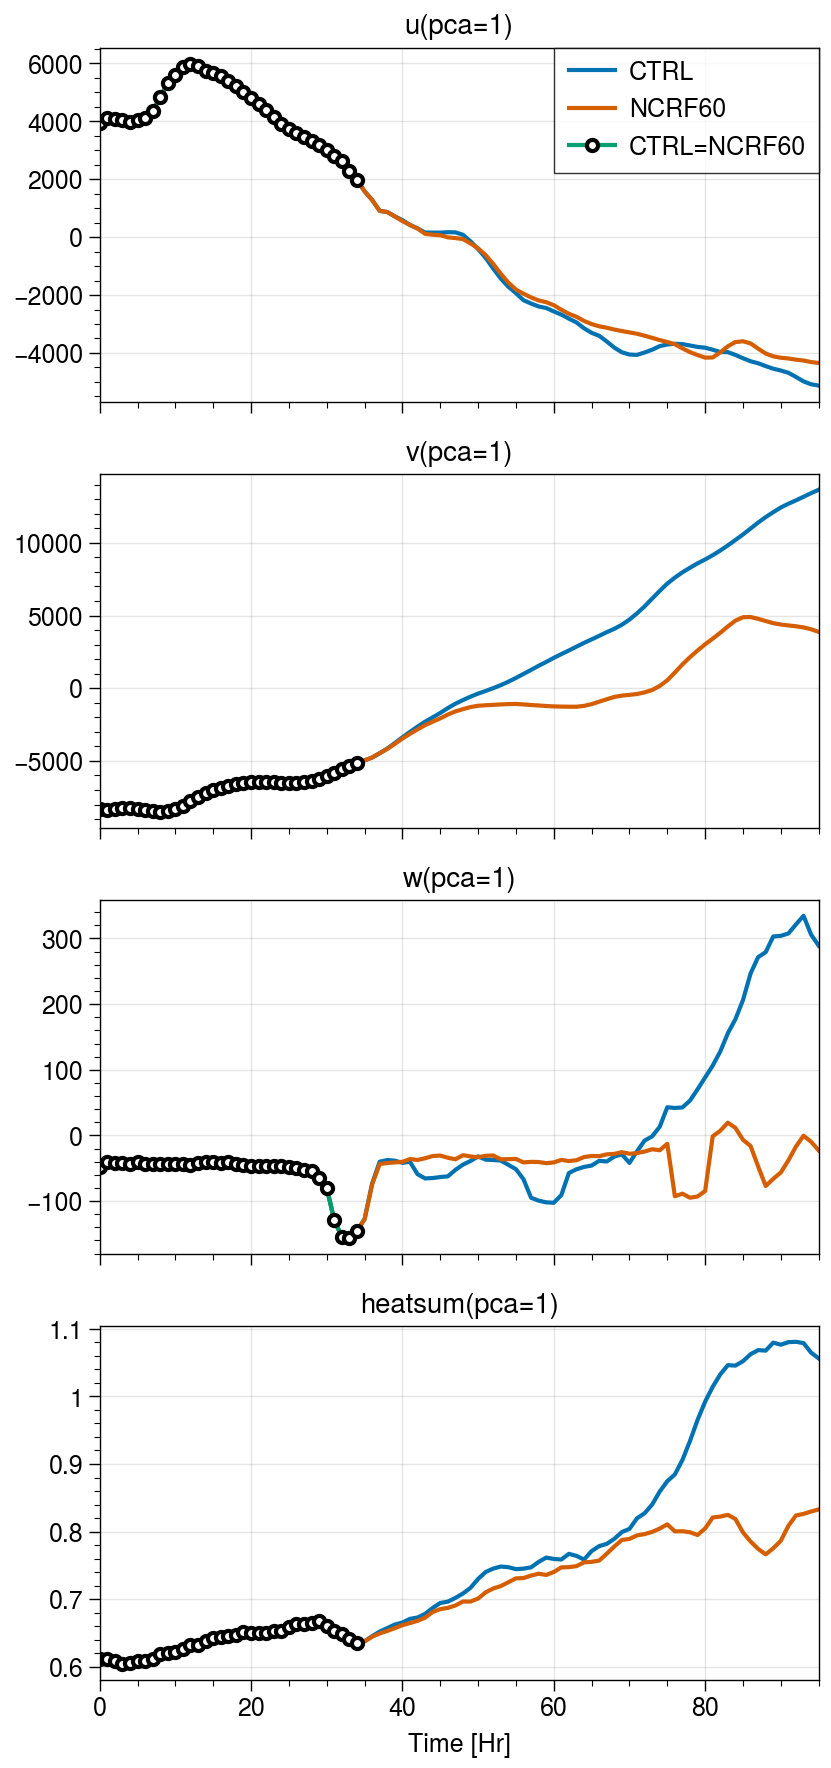

In [6]:
fig,axs = plot.subplots(ncols=1,nrows=4,axwidth=3.595,refaspect=2.031)
var = 'heatsum'
axs[0].plot(ctlPCA['u'].transform(ctl_var[0])[:,0],label='CTRL')
axs[0].plot(ctlPCA['u'].transform(ncrf60_var[0])[:,0],label='NCRF60')
axs[0].plot(np.ma.masked_not_equal(ctlPCA['u'].transform(ctl_var[0])[:,0],ctlPCA['u'].transform(ncrf60_var[0])[:,0]),\
         marker='o',markersize=4,mfc='w',mec='k',mew=1.5,label='CTRL=NCRF60')
axs[0].legend(loc='ur',ncols=1)
axs[0].format(title='u(pca=1)',xlabel='Time [Hr]')

axs[1].plot(ctlPCA['v'].transform(ctl_var[1])[:,0])
axs[1].plot(ctlPCA['v'].transform(ncrf60_var[1])[:,0])
axs[1].plot(np.ma.masked_not_equal(ctlPCA['v'].transform(ctl_var[1])[:,0],ctlPCA['v'].transform(ncrf60_var[1])[:,0]),\
         marker='o',markersize=4,mfc='w',mec='k',mew=1.5)
axs[1].format(title='v(pca=1)',xlabel='Time [Hr]')

axs[2].plot(ctlPCA['w'].transform(ctl_var[2])[:,0])
axs[2].plot(ctlPCA['w'].transform(ncrf60_var[2])[:,0])
axs[2].plot(np.ma.masked_not_equal(ctlPCA['w'].transform(ctl_var[2])[:,0],ctlPCA['w'].transform(ncrf60_var[2])[:,0]),\
         marker='o',markersize=4,mfc='w',mec='k',mew=1.5)
axs[2].format(title='w(pca=1)',xlabel='Time [Hr]')

axs[3].plot(ctlPCA['heatsum'].transform(ctl_var[3])[:,0])
axs[3].plot(ctlPCA['heatsum'].transform(ncrf60_var[3])[:,0])
axs[3].plot(np.ma.masked_not_equal(ctlPCA['heatsum'].transform(ctl_var[3])[:,0],ctlPCA['heatsum'].transform(ncrf60_var[3])[:,0]),\
         marker='o',markersize=4,mfc='w',mec='k',mew=1.5)
axs[3].format(title='heatsum(pca=1)',xlabel='Time [Hr]')

plt.savefig('./figures/PCAtest_new.png',dpi=200)
plt.show()